# X EDUCATION-LEAD SCORE

X-Education company wants to judge the customers (students) whether they pay for education or not. Educational companies normally work on these situations and call them as 'Leads'. 

### The step by step procedure to analyse business data as follows:


#### Step 1:  Read Data

#### Step 2:  Inspecting Data

#### Step 3:  Data Preparation

#### Step 4:  Test-Train Split

#### Step 5:  Feature Scaling

#### Step 6:  Looking at Correlations

#### Step 7:  Model Building

#### Step 8:  Feature Selection using RFE

#### Step 9:  Plotting the ROC Curve

#### Step 10: Finding the Optimal Cutoff point

#### Step 11: Making the predictions on the Testset

## Step 1: Read Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
from numpy import argmax

In [3]:
# Importing dataset

x_lead = pd.read_csv('Leads.csv')
x_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting Data

In [4]:
x_lead.shape

(9240, 37)

In [5]:
x_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
x_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 3: Data Preparation

#### 3.a Converting lengthy column names to small column names

In [7]:
x_lead = x_lead.rename(columns={'Lead Number':'Lead_Number',
                                'Lead Quality':'Lead_Quality','Last Activity':'Last_Activity',
                                'Page Views Per Visit':'Page_Views_Per_Visit',
                                'Do Not Email':'Do_Not_Email',
                                'Do Not Call':'Do_Not_Call',
                                'Lead Origin':'Lead_Origin',
                                'Lead Source':'Lead_Source',
                                'Update me on Supply Chain Content':'Supply_Chain_Updates',
                                'Get updates on DM Content':'DM_Updates',
                                'How did you hear about X Education':'X_Education_Promotion',
                                'Lead Profile':'Lead_Profile',
                                'Total Time Spent on Website':'Time_Spent_on_Website',
                                'What is your current occupation':'Current_Occupation',
                                'I agree to pay the amount through cheque':'Cheque_Payment',
                                'What matters most to you in choosing a course':'Reason_for_Course',
                                'Asymmetrique Activity Index':'Asymmetric_Activity_Index',
                                'Asymmetrique Profile Index':'Asymmetric_Profile_Index',
                                'Asymmetrique Activity Score':'Asymmetric_Activity_Score',
                                'Asymmetrique Profile Score':'Asymmetric_Profile_Score',
                                'A free copy of Mastering The Interview':'Copy_Request'})

In [8]:
x_lead.head(2)

,Prospect ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,...,DM_Updates,Lead_Profile,City,Asymmetric_Activity_Index,Asymmetric_Profile_Index,Asymmetric_Activity_Score,Asymmetric_Profile_Score,Cheque_Payment,Copy_Request,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


#### 3.b Drop unnecessary columns

In [9]:
x_lead.columns

Index(['Prospect ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'X_Education_Promotion',
       'Current_Occupation', 'Reason_for_Course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead_Quality',
       'Supply_Chain_Updates', 'DM_Updates', 'Lead_Profile', 'City',
       'Asymmetric_Activity_Index', 'Asymmetric_Profile_Index',
       'Asymmetric_Activity_Score', 'Asymmetric_Profile_Score',
       'Cheque_Payment', 'Copy_Request', 'Last Notable Activity'],
      dtype='object')

In [10]:
x_lead_o=x_lead.select_dtypes(include='object')

In [11]:
x_lead_n=x_lead.select_dtypes(exclude='object')

In [12]:
x_lead_o.dtypes

Prospect ID                               object
Lead_Origin                               object
Lead_Source                               object
Do_Not_Email                              object
Do_Not_Call                               object
Last_Activity                             object
Country                                   object
Specialization                            object
X_Education_Promotion                     object
Current_Occupation                        object
Reason_for_Course                         object
Search                                    object
Magazine                                  object
Newspaper Article                         object
X Education Forums                        object
Newspaper                                 object
Digital Advertisement                     object
Through Recommendations                   object
Receive More Updates About Our Courses    object
Tags                                      object
Lead_Quality        

In [13]:
x_lead_n.dtypes

Lead_Number                    int64
Converted                      int64
TotalVisits                  float64
Time_Spent_on_Website          int64
Page_Views_Per_Visit         float64
Asymmetric_Activity_Score    float64
Asymmetric_Profile_Score     float64
dtype: object

#### 3.c Dropping unnecessary columns 

In [14]:
# Let us look in to the object dataframe 

#Initially we remove 'Prospect ID' column from x_lead_o dataframe

x_lead_o=x_lead_o.drop(columns=['Prospect ID'],axis=1)

In [15]:
for col in x_lead_o.columns:
    print(x_lead_o[col].value_counts())
    print('*'*60)    

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead_Origin, dtype: int64
************************************************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
blog                    1
testone                 1
Pay per Click Ads       1
Name: Lead_Source, dtype: int64
************************************************************
No     8506
Yes     734
Name: Do_Not_Email, dtype: int64
***************************************************

In [16]:
# Dropping columns which have disproportional values in it

x_lead_o=x_lead_o.drop(columns=['Magazine','Newspaper','X Education Forums',
                                'Digital Advertisement','Through Recommendations',
                               'Receive More Updates About Our Courses','Supply_Chain_Updates',
                               'DM_Updates','Cheque_Payment','Do_Not_Call',
                               ],axis=1)

In [17]:
x_lead_o.isna().sum()

Lead_Origin                     0
Lead_Source                    36
Do_Not_Email                    0
Last_Activity                 103
Country                      2461
Specialization               1438
X_Education_Promotion        2207
Current_Occupation           2690
Reason_for_Course            2709
Search                          0
Newspaper Article               0
Tags                         3353
Lead_Quality                 4767
Lead_Profile                 2709
City                         1420
Asymmetric_Activity_Index    4218
Asymmetric_Profile_Index     4218
Copy_Request                    0
Last Notable Activity           0
dtype: int64

In [18]:
x_lead_o.isna().sum()

Lead_Origin                     0
Lead_Source                    36
Do_Not_Email                    0
Last_Activity                 103
Country                      2461
Specialization               1438
X_Education_Promotion        2207
Current_Occupation           2690
Reason_for_Course            2709
Search                          0
Newspaper Article               0
Tags                         3353
Lead_Quality                 4767
Lead_Profile                 2709
City                         1420
Asymmetric_Activity_Index    4218
Asymmetric_Profile_Index     4218
Copy_Request                    0
Last Notable Activity           0
dtype: int64

In [19]:
# Imputing the null values with mode values
for col in x_lead_o.columns:
    x_lead_o[col]=x_lead_o[col].fillna(x_lead_o[col].mode()[0])

In [20]:
x_lead_o.isna().sum()

Lead_Origin                  0
Lead_Source                  0
Do_Not_Email                 0
Last_Activity                0
Country                      0
Specialization               0
X_Education_Promotion        0
Current_Occupation           0
Reason_for_Course            0
Search                       0
Newspaper Article            0
Tags                         0
Lead_Quality                 0
Lead_Profile                 0
City                         0
Asymmetric_Activity_Index    0
Asymmetric_Profile_Index     0
Copy_Request                 0
Last Notable Activity        0
dtype: int64

In [21]:
x_lead_o.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Last_Activity,Country,Specialization,X_Education_Promotion,Current_Occupation,Reason_for_Course,Search,Newspaper Article,Tags,Lead_Quality,Lead_Profile,City,Asymmetric_Activity_Index,Asymmetric_Profile_Index,Copy_Request,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,No,Modified
1,API,Organic Search,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,Ringing,Might be,Select,Select,02.Medium,02.Medium,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No,Modified


#### 3.d Aggregating the values of Columns to classification reduction

In [22]:
# Lets convert 'Select' to null value because 'Select' is the value use to choose the value for query

for col in x_lead_o.columns:
    print(x_lead_o[col].value_counts())
    print('*'*50)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead_Origin, dtype: int64
**************************************************
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
blog                    1
testone                 1
Pay per Click Ads       1
Name: Lead_Source, dtype: int64
**************************************************
No     8506
Yes     734
Name: Do_Not_Email, dtype: int64
**************************************************
Email Opened        

In [23]:
origin_list=[]
for row in x_lead_o.Lead_Origin:
    if row!='Landing Page Submission' and row!='API':
        origin_list.append(row)
set_origin=set(origin_list)
uniq_origin_list=list(set_origin)
uniq_origin_list

['Lead Add Form', 'Quick Add Form', 'Lead Import']

In [24]:
x_lead_o.Lead_Origin=x_lead_o.Lead_Origin.replace(uniq_origin_list,'Other_online_gateways')

In [25]:
x_lead_o['Lead_Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Other_online_gateways       774
Name: Lead_Origin, dtype: int64

In [26]:
engine=['Google','Direct Traffic','Olark Chat','Organic Search']
source_list=[]
for row in x_lead_o.Lead_Source:
    if row not in engine:
        source_list.append(row)
set_source=set(source_list)
uniq_source_list=list(set_source)
uniq_source_list

['testone',
 'Referral Sites',
 'Reference',
 'Social Media',
 'youtubechannel',
 'WeLearn',
 'welearnblog_Home',
 'Welingak Website',
 'Live Chat',
 'google',
 'Press_Release',
 'Pay per Click Ads',
 'Facebook',
 'NC_EDM',
 'Click2call',
 'blog',
 'bing']

In [27]:
x_lead_o.Lead_Source=x_lead_o.Lead_Source.replace(uniq_source_list,'Other_References')

In [28]:
x_lead_o['Lead_Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Other_References     884
Name: Lead_Source, dtype: int64

In [29]:
c_list=[]
for row in x_lead_o.Country:
    if row!='India':
        c_list.append(row)
set_country=set(c_list)
uniq_list=list(set_country)
uniq_list

['Bahrain',
 'Sweden',
 'Sri Lanka',
 'United Arab Emirates',
 'Canada',
 'Uganda',
 'Russia',
 'Asia/Pacific Region',
 'Netherlands',
 'China',
 'Switzerland',
 'United States',
 'Qatar',
 'Tanzania',
 'Malaysia',
 'Australia',
 'Denmark',
 'Oman',
 'Vietnam',
 'Italy',
 'Philippines',
 'South Africa',
 'Kenya',
 'Saudi Arabia',
 'unknown',
 'Singapore',
 'Hong Kong',
 'France',
 'Ghana',
 'Nigeria',
 'Germany',
 'Indonesia',
 'Liberia',
 'United Kingdom',
 'Bangladesh',
 'Kuwait',
 'Belgium']

In [30]:
#for i in range(len(uniq_list)):
x_lead_o.Country=x_lead_o.Country.replace(uniq_list,'Other_Countries')

In [31]:
x_lead_o.Country

0                 India
1                 India
2                 India
3                 India
4                 India
             ...       
9235    Other_Countries
9236              India
9237              India
9238              India
9239    Other_Countries
Name: Country, Length: 9240, dtype: object

In [32]:
x_lead_o['Country'].value_counts()

India              8953
Other_Countries     287
Name: Country, dtype: int64

In [33]:
tags_list=[]
for row in x_lead_o.Tags:
    if row!='Will revert after reading the email' and row!='Ringing':
        tags_list.append(row)
tags_set=set(tags_list)
uniq_tag_list=list(tags_set)

In [34]:
x_lead_o['Tags']=x_lead_o['Tags'].replace(uniq_tag_list,'Other_than_email_and_phonecall')

In [35]:
x_lead_o.Tags.value_counts()

Will revert after reading the email    5425
Other_than_email_and_phonecall         2612
Ringing                                1203
Name: Tags, dtype: int64

In [36]:
q_list=[]
for row in x_lead_o.Lead_Quality:
    if row!='Might be' and row!='Not Sure':
        q_list.append(row)
q_set=set(q_list)
uniq_q_list=list(q_set)

In [37]:
x_lead_o['Lead_Quality']=x_lead_o['Lead_Quality'].replace(uniq_q_list,'Other_than_Might_be_and_Not_Sure')

In [38]:
x_lead_o.Lead_Quality.value_counts()

Might be                            6327
Other_than_Might_be_and_Not_Sure    1821
Not Sure                            1092
Name: Lead_Quality, dtype: int64

In [39]:
o_list=[]
for row in x_lead_o.Current_Occupation:
    if row!='Unemployed' and row!='Working Professional':
        o_list.append(row)
o_set=set(o_list)
uniq_o_list=list(o_set)

In [40]:
x_lead_o['Current_Occupation']=x_lead_o['Current_Occupation'].replace(uniq_o_list,'Others')

In [41]:
x_lead_o.Current_Occupation.value_counts()

Unemployed              8290
Working Professional     706
Others                   244
Name: Current_Occupation, dtype: int64

In [42]:
p_list=[]
for row in x_lead_o.Lead_Profile:
    if row!='Potential Lead' and row!='Select':
        p_list.append(row)
p_set=set(p_list)
uniq_p_list=list(p_set)

In [43]:
x_lead_o['Lead_Profile']=x_lead_o['Lead_Profile'].replace(uniq_p_list,'Other Leads')

In [44]:
x_lead_o.Lead_Profile.value_counts()

Select            6855
Potential Lead    1613
Other Leads        772
Name: Lead_Profile, dtype: int64

In [45]:
promo_list=[]
for row in x_lead_o.X_Education_Promotion:
    if row!='Select' and row!='Online Search':
        promo_list.append(row)
promo_set=set(promo_list)
uniq_promo_list=list(promo_set)

In [46]:
x_lead_o['X_Education_Promotion']=x_lead_o['X_Education_Promotion'].replace(uniq_promo_list,'Offline_Search')

In [47]:
x_lead_o.X_Education_Promotion.value_counts()

Select            7250
Offline_Search    1182
Online Search      808
Name: X_Education_Promotion, dtype: int64

#### 3.e Imputing 'Select' values as null and with mean and mode values

In [48]:
cols=['City','Specialization','X_Education_Promotion','Lead_Profile']

for col in cols:
    x_lead_o[col]=x_lead_o[col].replace('Select',np.nan)
    x_lead_o[col]=x_lead_o[col].replace(' ',np.nan)

In [49]:
x_lead_o.isna().sum()

Lead_Origin                     0
Lead_Source                     0
Do_Not_Email                    0
Last_Activity                   0
Country                         0
Specialization               3380
X_Education_Promotion        7250
Current_Occupation              0
Reason_for_Course               0
Search                          0
Newspaper Article               0
Tags                            0
Lead_Quality                    0
Lead_Profile                 6855
City                         2249
Asymmetric_Activity_Index       0
Asymmetric_Profile_Index        0
Copy_Request                    0
Last Notable Activity           0
dtype: int64

In [50]:
x_lead_o['X_Education_Promotion'].mode()[0]

'Offline_Search'

In [51]:
x_lead_o['Lead_Profile'].mode()[0]

'Potential Lead'

In [52]:
x_lead_o['Specialization'].mode()[0]

'Finance Management'

In [53]:
x_lead_o['Lead_Quality'].value_counts()

Might be                            6327
Other_than_Might_be_and_Not_Sure    1821
Not Sure                            1092
Name: Lead_Quality, dtype: int64

In [54]:
# x_lead_o.replace(['Might be','Not Sure'],'Not_Confident',inplace=True)
# x_lead_o.replace(['Other_than_Might_be_and_Not_Sure'],'Confident',inplace=True)

In [55]:
for col in cols:
    x_lead_o[col]=x_lead_o[col].fillna(x_lead_o[col].mode()[0])

In [56]:
x_lead_o.isna().sum()

Lead_Origin                  0
Lead_Source                  0
Do_Not_Email                 0
Last_Activity                0
Country                      0
Specialization               0
X_Education_Promotion        0
Current_Occupation           0
Reason_for_Course            0
Search                       0
Newspaper Article            0
Tags                         0
Lead_Quality                 0
Lead_Profile                 0
City                         0
Asymmetric_Activity_Index    0
Asymmetric_Profile_Index     0
Copy_Request                 0
Last Notable Activity        0
dtype: int64

In [57]:
x_lead_o['Asymmetric_Activity_Index'].replace({"01.High": "HIGH",
                       "02.Medium": "MEDIUM",
                       "03.Low": "LOW"},inplace = True) 

In [58]:
x_lead_o['Asymmetric_Profile_Index'].replace({"01.High": "HIGH",
                       "02.Medium": "MEDIUM",
                       "03.Low": "LOW"},inplace = True) 

In [59]:
x_lead_o['Asymmetric_Profile_Index'].head(5)

0    MEDIUM
1    MEDIUM
2      HIGH
3      HIGH
4      HIGH
Name: Asymmetric_Profile_Index, dtype: object

In [60]:
x_lead_o.isna().sum()

Lead_Origin                  0
Lead_Source                  0
Do_Not_Email                 0
Last_Activity                0
Country                      0
Specialization               0
X_Education_Promotion        0
Current_Occupation           0
Reason_for_Course            0
Search                       0
Newspaper Article            0
Tags                         0
Lead_Quality                 0
Lead_Profile                 0
City                         0
Asymmetric_Activity_Index    0
Asymmetric_Profile_Index     0
Copy_Request                 0
Last Notable Activity        0
dtype: int64

In [61]:
# Now let us consider numeric dataframe

x_lead_n.dtypes

Lead_Number                    int64
Converted                      int64
TotalVisits                  float64
Time_Spent_on_Website          int64
Page_Views_Per_Visit         float64
Asymmetric_Activity_Score    float64
Asymmetric_Profile_Score     float64
dtype: object

In [62]:
x_lead_n.isna().sum()

Lead_Number                     0
Converted                       0
TotalVisits                   137
Time_Spent_on_Website           0
Page_Views_Per_Visit          137
Asymmetric_Activity_Score    4218
Asymmetric_Profile_Score     4218
dtype: int64

In [63]:
x_lead_n.Asymmetric_Activity_Score.head()

0    15.0
1    15.0
2    14.0
3    13.0
4    15.0
Name: Asymmetric_Activity_Score, dtype: float64

In [64]:
x_lead_n.Asymmetric_Activity_Score.mean()

14.306252489048187

In [65]:
x_lead_n.Asymmetric_Profile_Score.mean()

16.344882516925527

In [66]:
x_lead_n['Asymmetric_Activity_Score'].fillna(round(x_lead_n['Asymmetric_Activity_Score'].mean(),1), inplace=True)

x_lead_n['Asymmetric_Profile_Score'].fillna(round(x_lead_n['Asymmetric_Profile_Score'].mean(),1), inplace=True)

In [67]:
x_lead_n.head(2)

,Lead_Number,Converted,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0


In [68]:
# Lets check whether dataframe possess null values
x_lead_n.isnull().values.sum()

274

In [69]:
# Lets remove those null values from the dataframe
x_lead_n=x_lead_n.dropna()

In [70]:
# Now check again for null values
x_lead_n.isnull().values.sum()

0

In [71]:
x_lead_n.drop(['Lead_Number'],axis=1,inplace=True)

In [72]:
x_lead_n.head()

,Converted,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score
0,0,0.0,0,0.0,15.0,15.0
1,0,5.0,674,2.5,15.0,15.0
2,1,2.0,1532,2.0,14.0,20.0
3,0,1.0,305,1.0,13.0,17.0
4,1,2.0,1428,1.0,15.0,18.0


In [73]:
x_lead_n.shape

(9103, 6)

In [74]:
x_lead_n['Prospect ID']=x_lead['Prospect ID']

In [75]:
x_lead_n.isna().sum()

Converted                    0
TotalVisits                  0
Time_Spent_on_Website        0
Page_Views_Per_Visit         0
Asymmetric_Activity_Score    0
Asymmetric_Profile_Score     0
Prospect ID                  0
dtype: int64

In [76]:
x_lead_o.shape

(9240, 19)

In [77]:
x_lead_o['Prospect ID']=x_lead['Prospect ID']

In [78]:
x_lead_o.isna().sum()

Lead_Origin                  0
Lead_Source                  0
Do_Not_Email                 0
Last_Activity                0
Country                      0
Specialization               0
X_Education_Promotion        0
Current_Occupation           0
Reason_for_Course            0
Search                       0
Newspaper Article            0
Tags                         0
Lead_Quality                 0
Lead_Profile                 0
City                         0
Asymmetric_Activity_Index    0
Asymmetric_Profile_Index     0
Copy_Request                 0
Last Notable Activity        0
Prospect ID                  0
dtype: int64

In [79]:
# Merge the two dataframes 

x_lead_m=x_lead_o.merge(x_lead_n,how='left')

In [80]:
x_lead_m.isna().sum()

Lead_Origin                    0
Lead_Source                    0
Do_Not_Email                   0
Last_Activity                  0
Country                        0
Specialization                 0
X_Education_Promotion          0
Current_Occupation             0
Reason_for_Course              0
Search                         0
Newspaper Article              0
Tags                           0
Lead_Quality                   0
Lead_Profile                   0
City                           0
Asymmetric_Activity_Index      0
Asymmetric_Profile_Index       0
Copy_Request                   0
Last Notable Activity          0
Prospect ID                    0
Converted                    137
TotalVisits                  137
Time_Spent_on_Website        137
Page_Views_Per_Visit         137
Asymmetric_Activity_Score    137
Asymmetric_Profile_Score     137
dtype: int64

In [81]:
x_lead_m=x_lead_m.dropna()

In [82]:
x_lead_m.isna().sum()

Lead_Origin                  0
Lead_Source                  0
Do_Not_Email                 0
Last_Activity                0
Country                      0
Specialization               0
X_Education_Promotion        0
Current_Occupation           0
Reason_for_Course            0
Search                       0
Newspaper Article            0
Tags                         0
Lead_Quality                 0
Lead_Profile                 0
City                         0
Asymmetric_Activity_Index    0
Asymmetric_Profile_Index     0
Copy_Request                 0
Last Notable Activity        0
Prospect ID                  0
Converted                    0
TotalVisits                  0
Time_Spent_on_Website        0
Page_Views_Per_Visit         0
Asymmetric_Activity_Score    0
Asymmetric_Profile_Score     0
dtype: int64

In [83]:
x_lead_m.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Last_Activity,Country,Specialization,X_Education_Promotion,Current_Occupation,Reason_for_Course,Search,...,Asymmetric_Profile_Index,Copy_Request,Last Notable Activity,Prospect ID,Converted,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score
0,API,Olark Chat,No,Page Visited on Website,India,Finance Management,Offline_Search,Unemployed,Better Career Prospects,No,...,MEDIUM,No,Modified,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.0,0.0,0.0,0.0,15.0,15.0
1,API,Organic Search,No,Email Opened,India,Finance Management,Offline_Search,Unemployed,Better Career Prospects,No,...,MEDIUM,No,Email Opened,2a272436-5132-4136-86fa-dcc88c88f482,0.0,5.0,674.0,2.5,15.0,15.0
2,Landing Page Submission,Direct Traffic,No,Email Opened,India,Business Administration,Offline_Search,Others,Better Career Prospects,No,...,HIGH,Yes,Email Opened,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1.0,2.0,1532.0,2.0,14.0,20.0
3,Landing Page Submission,Direct Traffic,No,Unreachable,India,Media and Advertising,Offline_Search,Unemployed,Better Career Prospects,No,...,HIGH,No,Modified,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.0,1.0,305.0,1.0,13.0,17.0
4,Landing Page Submission,Google,No,Converted to Lead,India,Finance Management,Offline_Search,Unemployed,Better Career Prospects,No,...,HIGH,No,Modified,3256f628-e534-4826-9d63-4a8b88782852,1.0,2.0,1428.0,1.0,15.0,18.0


In [84]:
# Let us remove the unnecessary variables 

x_lead_m.drop(['Prospect ID'], axis = 1, inplace = True) 

#### 3.f For categorical variables with multiple levels, create dummy features

In [85]:
o_list=[]
for col in x_lead_m.columns:
    if x_lead_m[col].dtype=='object':
        o_list.append(col)
o_list

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Last_Activity',
 'Country',
 'Specialization',
 'X_Education_Promotion',
 'Current_Occupation',
 'Reason_for_Course',
 'Search',
 'Newspaper Article',
 'Tags',
 'Lead_Quality',
 'Lead_Profile',
 'City',
 'Asymmetric_Activity_Index',
 'Asymmetric_Profile_Index',
 'Copy_Request',
 'Last Notable Activity']

In [86]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_x = pd.get_dummies(x_lead_m[o_list], drop_first=True)

# Adding the results to the master dataframe
x_lead_dum = pd.concat([x_lead_m, dummy_x], axis=1)

In [87]:
x_lead_dum.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Last_Activity,Country,Specialization,X_Education_Promotion,Current_Occupation,Reason_for_Course,Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,Page Visited on Website,India,Finance Management,Offline_Search,Unemployed,Better Career Prospects,No,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,Email Opened,India,Finance Management,Offline_Search,Unemployed,Better Career Prospects,No,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,Email Opened,India,Business Administration,Offline_Search,Others,Better Career Prospects,No,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,Unreachable,India,Media and Advertising,Offline_Search,Unemployed,Better Career Prospects,No,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,Converted to Lead,India,Finance Management,Offline_Search,Unemployed,Better Career Prospects,No,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the repeated variables

In [88]:
x_lead_dum = x_lead_dum.drop(columns=o_list,axis=1)

In [89]:
x_lead_dum.columns

Index(['Converted', 'TotalVisits', 'Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Asymmetric_Activity_Score',
       'Asymmetric_Profile_Score', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Other_online_gateways', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Other_References', 'Do_Not_Email_Yes',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Marked Spam',
       'Last_Activity_Email Opened', 'Last_Activity_Email Received',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website',
       'Last_Activity_Resubscribed to emails', 'Last_Activity_SMS Sent',
       'Last_Activity_Unreachable', 'Last_Activity_Unsubscribed',
       'Last_Activity_View in browser link Clicked',
       'Las

In [90]:
x_lead_dum .shape

(9103, 84)

In [91]:
x_lead_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 84 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           9103 non-null   float64
 1   TotalVisits                                         9103 non-null   float64
 2   Time_Spent_on_Website                               9103 non-null   float64
 3   Page_Views_Per_Visit                                9103 non-null   float64
 4   Asymmetric_Activity_Score                           9103 non-null   float64
 5   Asymmetric_Profile_Score                            9103 non-null   float64
 6   Lead_Origin_Landing Page Submission                 9103 non-null   uint8  
 7   Lead_Origin_Other_online_gateways                   9103 non-null   uint8  
 8   Lead_Source_Google                                  9103 non-null   uint8  
 9

#### 3.g Checking for Outliers

In [92]:
x_lead_dum.select_dtypes(include='float').columns

Index(['Converted', 'TotalVisits', 'Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Asymmetric_Activity_Score',
       'Asymmetric_Profile_Score'],
      dtype='object')

In [93]:
num_col_list=list(x_lead_dum.select_dtypes(include='float').columns)

In [94]:
# Checking for outliers in the continuous variables
num_x_lead = x_lead_dum[num_col_list]

In [95]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_x_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820,14.308074,16.319829
std,0.485464,4.854853,545.066142,2.161418,1.027054,1.327290
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,9.000000,1.000000,14.000000,16.000000
50%,0.000000,3.000000,244.000000,2.000000,14.300000,16.300000
75%,1.000000,5.000000,919.500000,3.000000,14.300000,16.300000
90%,1.000000,7.000000,1372.000000,5.000000,15.000000,18.000000
95%,1.000000,10.000000,1556.900000,6.000000,16.000000,19.000000
99%,1.000000,17.000000,1838.960000,9.000000,17.000000,20.000000


In [96]:
# We observe outliers in the column 'Time_Spent_on_Website'

low_qua=x_lead_dum['Time_Spent_on_Website'].quantile(0.20)
hi_qua=x_lead_dum['Time_Spent_on_Website'].quantile(0.95)

In [97]:
low_qua

0.0

In [98]:
hi_qua

1556.8999999999996

In [99]:
x_lead_dum=x_lead_dum[(x_lead_dum['Time_Spent_on_Website']>low_qua) & (x_lead_dum['Time_Spent_on_Website']<hi_qua)]

In [100]:
x_lead_dum.isna().sum()

Converted                                             0
TotalVisits                                           0
Time_Spent_on_Website                                 0
Page_Views_Per_Visit                                  0
Asymmetric_Activity_Score                             0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 84, dtype: int64

In [101]:
x_lead_dum['Time_Spent_on_Website']=x_lead_dum['Time_Spent_on_Website'].fillna(x_lead_dum['Time_Spent_on_Website'].mean())

Lets check whether there is null values present in the dataframe

In [102]:
x_lead_dum.isna().values.sum()

0

We don't have any missing values

In [103]:
x_lead_dum['Time_Spent_on_Website']=x_lead_dum['Time_Spent_on_Website'].round(2)

In [104]:
x_lead_dum['Time_Spent_on_Website'].head()

1     674.0
2    1532.0
3     305.0
4    1428.0
8      71.0
Name: Time_Spent_on_Website, dtype: float64

In [105]:
### Checking the Convert Rate
convert = (sum(x_lead_dum['Converted'])/len(x_lead_dum['Converted'].index))*100
convert

34.62968701580415

We have almost 34.6% convert rate

## Step 4: Looking at Correlations

In [106]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

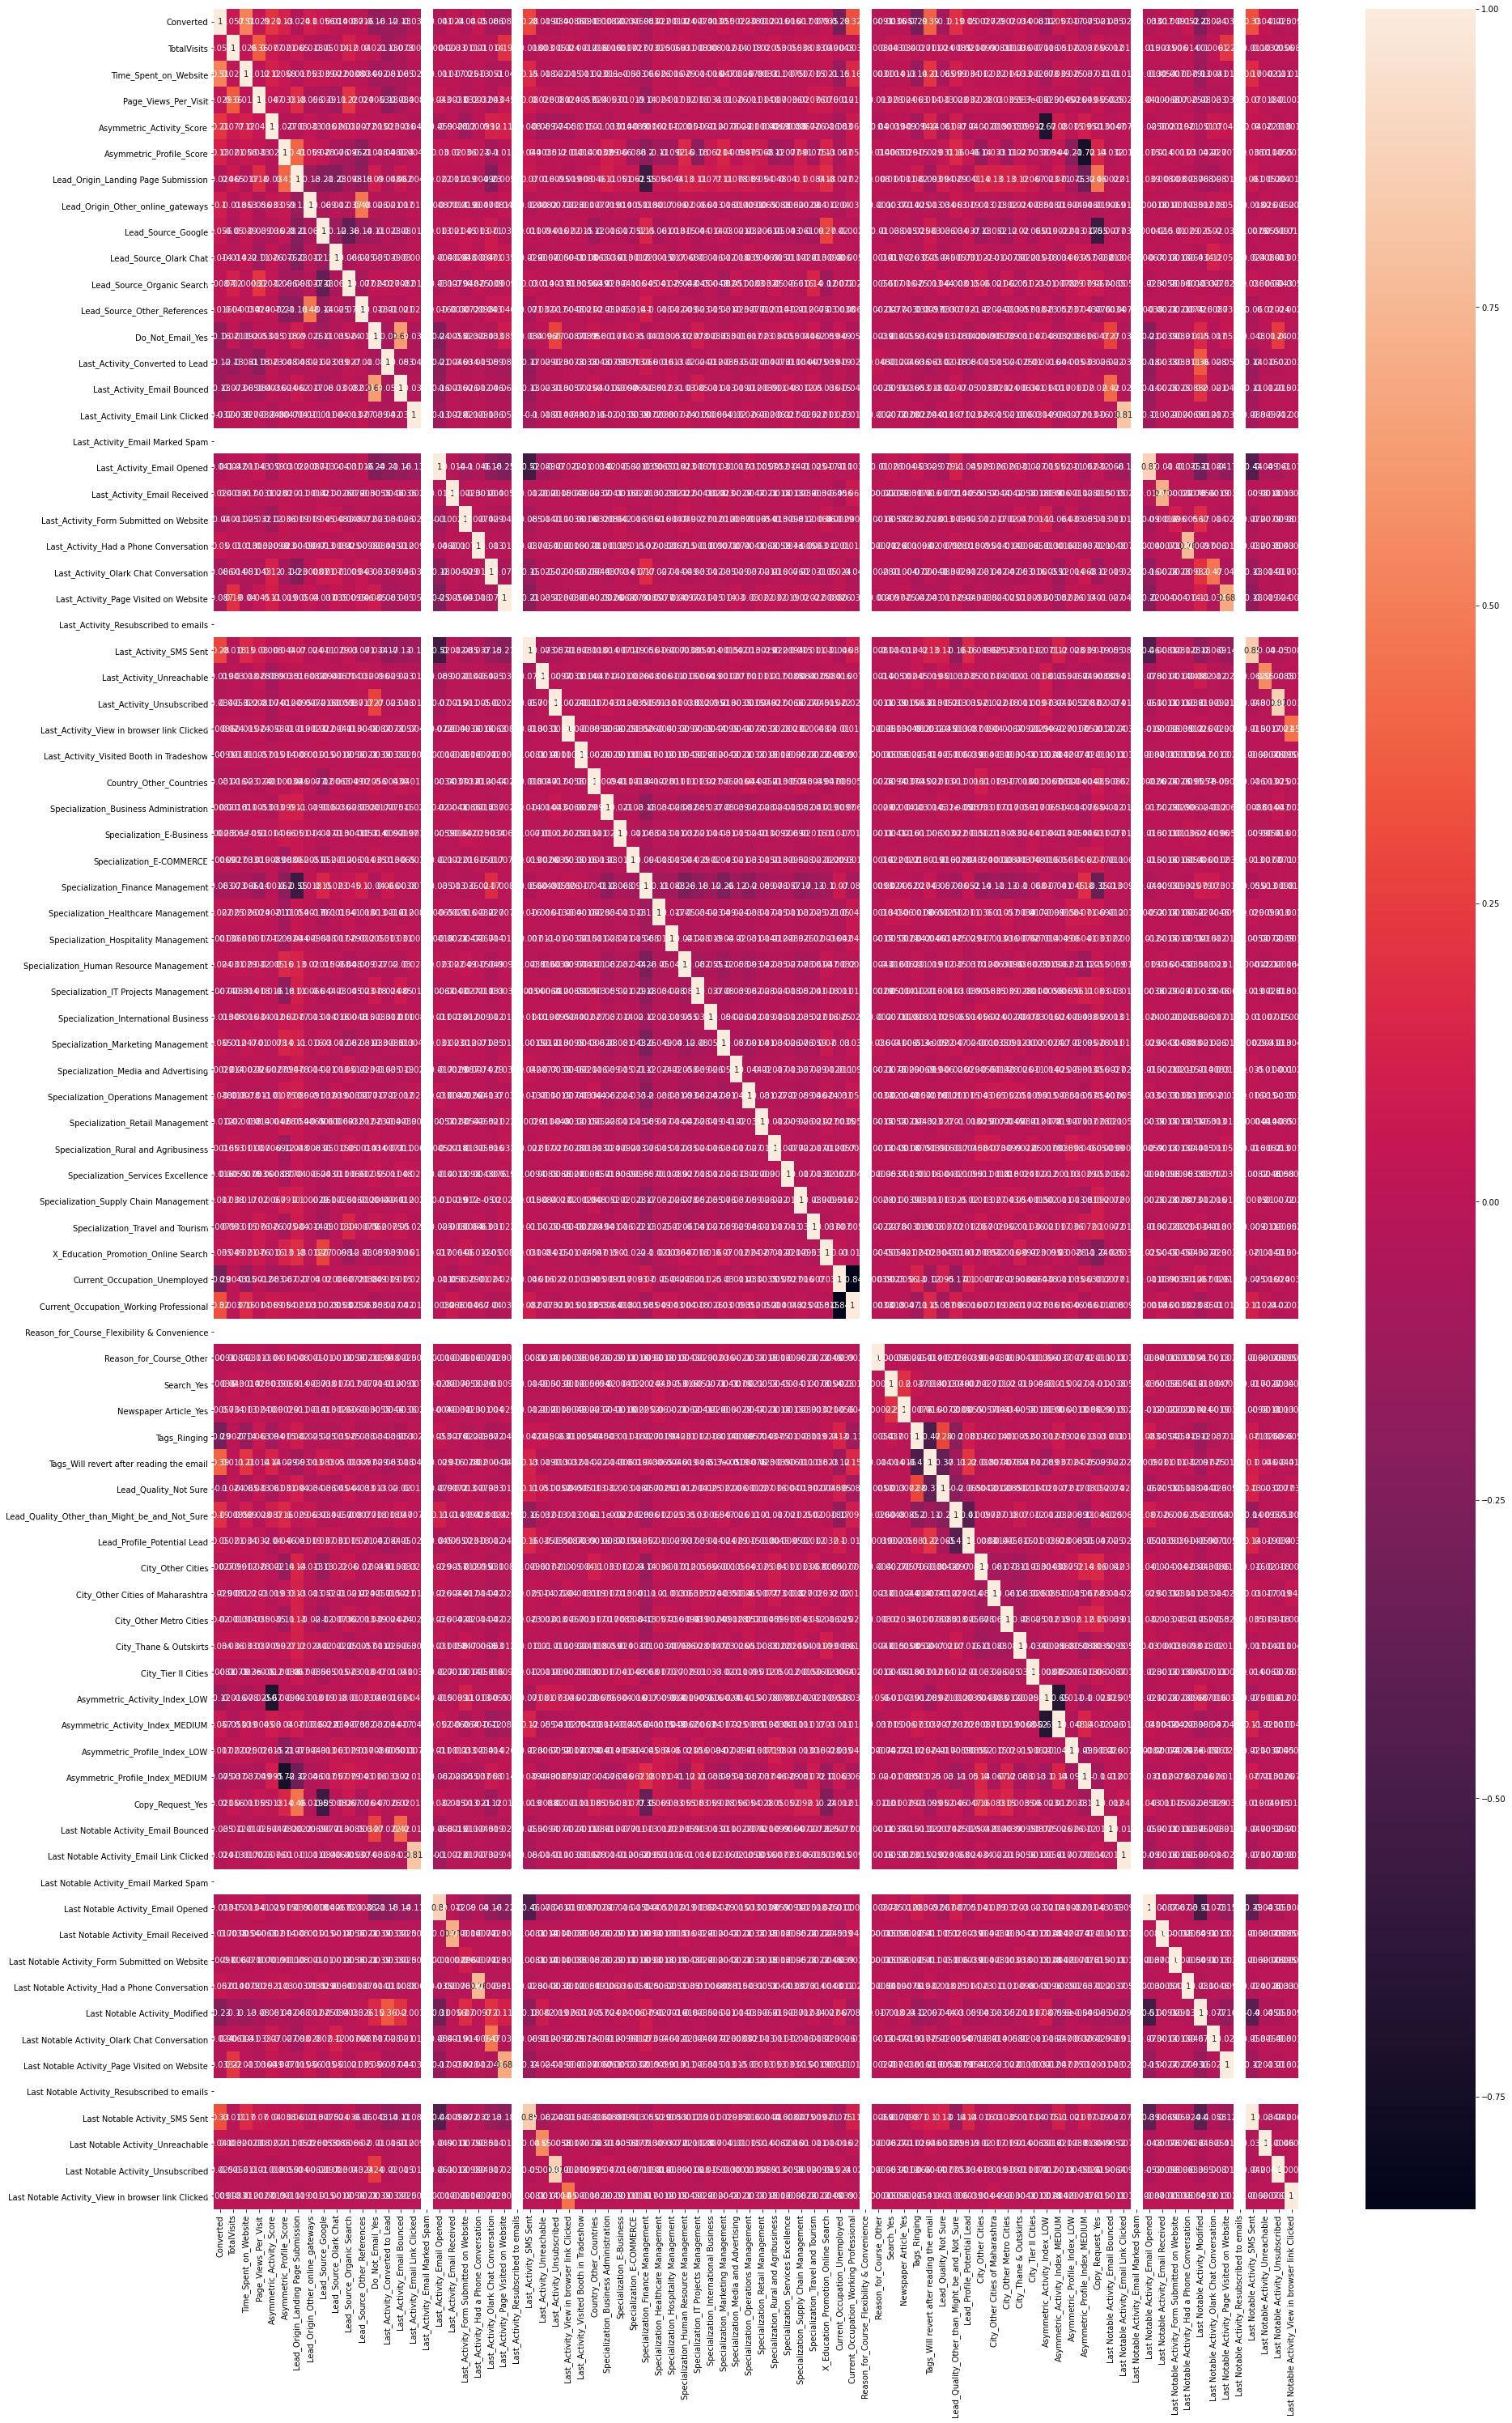

In [107]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,50))        # Size of the figure
sns.heatmap(x_lead_dum.corr(),annot = True)
plt.show()

In [108]:
X=x_lead_dum.drop(['Converted'],axis=1)
y=x_lead_dum['Converted']

#### 4.a Dropping highly correlated dummy variables

In [109]:
cor_matrix = X.corr().abs()

In [110]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [111]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

In [112]:
to_drop

['Last Notable Activity_Email Opened', 'Last Notable Activity_Unsubscribed']

In [113]:
X_no_corr = X.drop(columns=to_drop, axis=1)
X_no_corr.head()

,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score,Lead_Origin_Landing Page Submission,Lead_Origin_Other_online_gateways,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
1,5.0,674.0,2.5,15.0,15.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,14.0,20.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305.0,1.0,13.0,17.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428.0,1.0,15.0,18.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,2.0,71.0,2.0,14.0,14.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
X_no_corr.head()

,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score,Lead_Origin_Landing Page Submission,Lead_Origin_Other_online_gateways,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
1,5.0,674.0,2.5,15.0,15.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,14.0,20.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305.0,1.0,13.0,17.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428.0,1.0,15.0,18.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,2.0,71.0,2.0,14.0,14.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
X=X_no_corr

## Step 5: Feature Selection Using RFE

In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [117]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rfc, n_features_to_select=10)             # running RFE with 15 variables as output
_ = rfe.fit(X, y)

In [118]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False])

In [119]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', True, 1),
 ('Asymmetric_Activity_Score', True, 1),
 ('Asymmetric_Profile_Score', True, 1),
 ('Lead_Origin_Landing Page Submission', False, 12),
 ('Lead_Origin_Other_online_gateways', False, 25),
 ('Lead_Source_Google', False, 7),
 ('Lead_Source_Olark Chat', False, 39),
 ('Lead_Source_Organic Search', False, 13),
 ('Lead_Source_Other_References', False, 34),
 ('Do_Not_Email_Yes', False, 10),
 ('Last_Activity_Converted to Lead', False, 26),
 ('Last_Activity_Email Bounced', False, 31),
 ('Last_Activity_Email Link Clicked', False, 35),
 ('Last_Activity_Email Marked Spam', False, 68),
 ('Last_Activity_Email Opened', False, 8),
 ('Last_Activity_Email Received', False, 62),
 ('Last_Activity_Form Submitted on Website', False, 48),
 ('Last_Activity_Had a Phone Conversation', False, 45),
 ('Last_Activity_Olark Chat Conversation', False, 30),
 ('Last_Activity_Page Visited on Website', False, 20),
 ('Last_Act

In [120]:
col = X.columns[rfe.support_]

In [121]:
col

Index(['TotalVisits', 'Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Asymmetric_Activity_Score', 'Asymmetric_Profile_Score',
       'Current_Occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Lead_Quality_Other_than_Might_be_and_Not_Sure',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [122]:
X=X.loc[:,rfe.support_]

In [123]:
X=X.rename(columns={'Last_Activity_SMS Sent':'Last_Activity_SMS_Sent',
                    'Specialization_Finance Management':'Specialization_Finance_Management',
                  'Current_Occupation_Working Professional':'Current_Occupation_Working_Professional',
                    'Tags_Will revert after reading the email':'Tags_Will_revert_after_reading_the_email',
                    'Last Notable Activity_Modified':'Last_Notable_Activity_Modified',
                    'Last Notable Activity_SMS Sent':'Last_Notable_Activity_SMS_Sent'})

In [124]:
X.columns

Index(['TotalVisits', 'Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Asymmetric_Activity_Score', 'Asymmetric_Profile_Score',
       'Current_Occupation_Working_Professional', 'Tags_Ringing',
       'Tags_Will_revert_after_reading_the_email',
       'Lead_Quality_Other_than_Might_be_and_Not_Sure',
       'Last_Notable_Activity_SMS_Sent'],
      dtype='object')

In [125]:
X['Time_Spent_on_Website']=X['Time_Spent_on_Website'].apply(float)

In [126]:
X['Time_Spent_on_Website'].dtype

dtype('float64')

In [127]:
X.head()

,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
1,5.0,674.0,2.5,15.0,15.0,0,1,0,0,0
2,2.0,1532.0,2.0,14.0,20.0,0,0,1,0,0
3,1.0,305.0,1.0,13.0,17.0,0,1,0,0,0
4,2.0,1428.0,1.0,15.0,18.0,0,0,1,0,0
8,2.0,71.0,2.0,14.0,14.0,0,0,1,0,0


## Step 6: Test-Train Split

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
# Putting feature variable to X

In [130]:
X.head()

,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
1,5.0,674.0,2.5,15.0,15.0,0,1,0,0,0
2,2.0,1532.0,2.0,14.0,20.0,0,0,1,0,0
3,1.0,305.0,1.0,13.0,17.0,0,1,0,0,0
4,2.0,1428.0,1.0,15.0,18.0,0,0,1,0,0
8,2.0,71.0,2.0,14.0,14.0,0,0,1,0,0


In [131]:
X.dtypes

TotalVisits                                      float64
Time_Spent_on_Website                            float64
Page_Views_Per_Visit                             float64
Asymmetric_Activity_Score                        float64
Asymmetric_Profile_Score                         float64
Current_Occupation_Working_Professional            uint8
Tags_Ringing                                       uint8
Tags_Will_revert_after_reading_the_email           uint8
Lead_Quality_Other_than_Might_be_and_Not_Sure      uint8
Last_Notable_Activity_SMS_Sent                     uint8
dtype: object

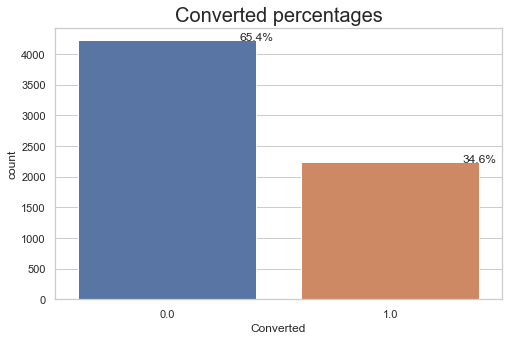

In [132]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(x_lead_dum))
ax = sns.countplot(x=x_lead_dum.Converted, data=x_lead_dum)
plt.title('Converted percentages', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [133]:
# Putting response variable to y
y = x_lead_dum['Converted']

y.head()

y.value_counts()

0.0    4219
1.0    2235
Name: Converted, dtype: int64

In [134]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Step 7: Model Building

In [135]:
# Let's start by splitting our data into a training set and a test set.

#### Running our First Training Model

In [136]:
import statsmodels.api as sm

### Logistic regression model

#### 7.a Assessing the model with StatsModels

In [137]:
#sm.families.Binomial() represents Logistic Regression of Generalized Linear Model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) 
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4517
Model:                            GLM   Df Residuals:                     4506
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.3
Date:                Fri, 11 Nov 2022   Deviance:                       3002.6
Time:                        23:12:23   Pearson chi2:                 6.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           -14.7734      1.084    -13.628      0.000     -16.898     -12.649
TotalVisits                                       0.0110      0.010      1.097      0.273      -0.009       0.031
Time_Spent_on_Website                             0.0025      0.000     24.273      0.000       0.002       0.003
Page_Views_Per_Visit                             -0.0035      0.024     -0.148      0.883      -0.050       0.043
Asymmetric_Activity_Score                         0.4811      0.057      8.484      0.000       0.370       0.592
Asymmetric_Profile_Score                          0.2318      0.036      6.364      0.000       0.160       0.303
Current_Occupation_Working_Professional           2.5699      0.252     10.197      0.000       2.076       3.064
Tags_Ringing                                     -2.3725      0.286     -8.295      0.000      -2.933      -1.812
Tags_Will_revert_after_reading_the_email          1.6694      0.113     14.735      0.000       1.447       1.891
Lead_Quality_Other_than_Might_be_and_Not_Sure     1.5371      0.129     11.933      0.000       1.285       1.790
Last_Notable_Activity_SMS_Sent                    2.2925      0.121     18.990      0.000       2.056       2.529
=================================================================================================================
"""

In [138]:
X_train = X_train.drop(['Page_Views_Per_Visit'], axis=1)

In [139]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4517
Model:                            GLM   Df Residuals:                     4507
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.3
Date:                Fri, 11 Nov 2022   Deviance:                       3002.6
Time:                        23:12:23   Pearson chi2:                 6.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           -14.7748      1.084    -13.630      0.000     -16.899     -12.650
TotalVisits                                       0.0104      0.009      1.155      0.248      -0.007       0.028
Time_Spent_on_Website                             0.0025      0.000     24.273      0.000       0.002       0.003
Asymmetric_Activity_Score                         0.4808      0.057      8.484      0.000       0.370       0.592
Asymmetric_Profile_Score                          0.2318      0.036      6.364      0.000       0.160       0.303
Current_Occupation_Working_Professional           2.5698      0.252     10.196      0.000       2.076       3.064
Tags_Ringing                                     -2.3751      0.286     -8.319      0.000      -2.935      -1.816
Tags_Will_revert_after_reading_the_email          1.6685      0.113     14.747      0.000       1.447       1.890
Lead_Quality_Other_than_Might_be_and_Not_Sure     1.5366      0.129     11.933      0.000       1.284       1.789
Last_Notable_Activity_SMS_Sent                    2.2913      0.120     19.027      0.000       2.055       2.527
=================================================================================================================
"""

In [140]:
X_train = X_train.drop(['TotalVisits'], axis=1)

In [141]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4517
Model:                            GLM   Df Residuals:                     4508
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1502.0
Date:                Fri, 11 Nov 2022   Deviance:                       3003.9
Time:                        23:12:24   Pearson chi2:                 6.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           -14.8482      1.083    -13.706      0.000     -16.971     -12.725
Time_Spent_on_Website                             0.0025      0.000     24.308      0.000       0.002       0.003
Asymmetric_Activity_Score                         0.4868      0.056      8.616      0.000       0.376       0.598
Asymmetric_Profile_Score                          0.2338      0.036      6.425      0.000       0.162       0.305
Current_Occupation_Working_Professional           2.5664      0.252     10.193      0.000       2.073       3.060
Tags_Ringing                                     -2.3739      0.285     -8.316      0.000      -2.933      -1.814
Tags_Will_revert_after_reading_the_email          1.6704      0.113     14.766      0.000       1.449       1.892
Lead_Quality_Other_than_Might_be_and_Not_Sure     1.5327      0.129     11.912      0.000       1.281       1.785
Last_Notable_Activity_SMS_Sent                    2.2879      0.120     19.011      0.000       2.052       2.524
=================================================================================================================
"""

In [142]:
len(X_train.columns)

8

In [143]:
len(X_test.columns)

10

In [144]:
X_train_sm = sm.add_constant(X_train)

In [145]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7843    0.014762
3988    0.001034
6358    0.041842
5068    0.957661
3460    0.065019
5483    0.109856
1010    0.982634
837     0.012565
4798    0.031434
9193    0.008658
dtype: float64

In [146]:
y_train_pred = np.array(y_train_pred).reshape(-1)
y_train_pred[:10]

array([0.01476169, 0.00103402, 0.04184156, 0.95766066, 0.06501877,
       0.10985629, 0.98263391, 0.01256549, 0.031434  , 0.00865754])

#### 7.b Creating a dataframe with the actual convert flag and the predicted probabilities

In [147]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number
0,0.0,0.014762,7843
1,0.0,0.001034,3988
2,0.0,0.041842,6358
3,1.0,0.957661,5068
4,0.0,0.065019,3460


#### 7.c Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [148]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,predicted
0,0.0,0.014762,7843,0
1,0.0,0.001034,3988,0
2,0.0,0.041842,6358,0
3,1.0,0.957661,5068,1
4,0.0,0.065019,3460,0


In [149]:
from sklearn import metrics

In [150]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2690  267]
 [ 377 1183]]


In [151]:
# Predicted          not_converted    converted
# Actual
# not_converted        2690            267
# converted            377            1183

In [152]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8574274961257472


#### 7.d Checking VIFs

In [153]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Asymmetric_Activity_Score,88.92
2,Asymmetric_Profile_Score,87.01
5,Tags_Will_revert_after_reading_the_email,3.25
0,Time_Spent_on_Website,2.62
4,Tags_Ringing,1.69
6,Lead_Quality_Other_than_Might_be_and_Not_Sure,1.44
7,Last_Notable_Activity_SMS_Sent,1.41
3,Current_Occupation_Working_Professional,1.14


In [155]:
# As VIF values of top two columns are very high they must be removed

X_train=X_train.drop(['Asymmetric_Activity_Score'],axis=1)

In [156]:
len(X_train.values)

4517

In [157]:
X_train.shape[1]

7

In [158]:
vifu = pd.DataFrame()
vifu['Features'] = X_train.columns
#vif['Features'] = X_train.columns
vifu['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vifu['VIF'] = round(vifu['VIF'], 2)
vifu = vifu.sort_values(by = "VIF", ascending = False)
vifu

,Features,VIF
1,Asymmetric_Profile_Score,5.22
4,Tags_Will_revert_after_reading_the_email,3.17
0,Time_Spent_on_Website,2.60
3,Tags_Ringing,1.69
5,Lead_Quality_Other_than_Might_be_and_Not_Sure,1.44
6,Last_Notable_Activity_SMS_Sent,1.41
2,Current_Occupation_Working_Professional,1.14


In [159]:
colm_vifu=X_train.columns.to_list()
colm_vifu

['Time_Spent_on_Website',
 'Asymmetric_Profile_Score',
 'Current_Occupation_Working_Professional',
 'Tags_Ringing',
 'Tags_Will_revert_after_reading_the_email',
 'Lead_Quality_Other_than_Might_be_and_Not_Sure',
 'Last_Notable_Activity_SMS_Sent']

In [160]:
# Finalized Columns of X_train depending on p-values and VIFs
X_train_sm = sm.add_constant(X_train)

In [161]:
#X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4517
Model:                            GLM   Df Residuals:                     4509
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1542.4
Date:                Fri, 11 Nov 2022   Deviance:                       3084.7
Time:                        23:12:26   Pearson chi2:                 6.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -7.4012      0.600    -12.343      0.000      -8.576      -6.226
Time_Spent_on_Website                             0.0025      0.000     24.771      0.000       0.002       0.003
Asymmetric_Profile_Score                          0.2012      0.035      5.739      0.000       0.133       0.270
Current_Occupation_Working_Professional           2.5218      0.246     10.249      0.000       2.040       3.004
Tags_Ringing                                     -2.3942      0.283     -8.445      0.000      -2.950      -1.839
Tags_Will_revert_after_reading_the_email          1.7284      0.112     15.470      0.000       1.509       1.947
Lead_Quality_Other_than_Might_be_and_Not_Sure     1.6142      0.128     12.659      0.000       1.364       1.864
Last_Notable_Activity_SMS_Sent                    2.2544      0.119     19.002      0.000       2.022       2.487
=================================================================================================================
"""

In [162]:
y_train_pred = res.predict(X_train_sm)

In [163]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8574274961257472


In [164]:
X_test.head()

,TotalVisits,Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetric_Activity_Score,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
152,2.0,234.0,1.0,15.0,18.0,0,0,0,0,0
2956,4.0,1344.0,4.0,14.3,16.3,0,0,0,0,0
4598,3.0,169.0,3.0,14.3,16.3,0,0,0,1,0
4210,4.0,409.0,4.0,14.3,16.3,0,0,1,0,0
7361,2.0,61.0,2.0,10.0,15.0,0,0,1,0,1


In [165]:
X_test=X_test[colm_vifu]

In [166]:
# Standardization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_sc=scaler.fit_transform(X_train)

In [167]:
# Let's re-run the model using the selected variables
X_train_sm_vif = sm.add_constant(X_train_sc)
logm_vif = sm.GLM(y_train,X_train_sm_vif, family = sm.families.Binomial())
res = logm_vif.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4517
Model:                            GLM   Df Residuals:                     4509
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1542.4
Date:                Fri, 11 Nov 2022   Deviance:                       3084.7
Time:                        23:12:26   Pearson chi2:                 6.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1630      0.059    -19.817      0.000      -1.278      -1.048
x1             1.1768      0.048     24.771      0.000       1.084       1.270
x2             0.2710      0.047      5.739      0.000       0.178       0.364
x3             0.6240      0.061     10.249      0.000       0.505       0.743
x4            -0.8684      0.103     -8.445      0.000      -1.070      -0.667
x5             0.8601      0.056     15.470      0.000       0.751       0.969
x6             0.6286      0.050     12.659      0.000       0.531       0.726
x7             0.9507      0.050     19.002      0.000       0.853       1.049
==============================================================================
"""

In [168]:
y_train_pred = np.array(res.predict(X_train_sm_vif)).reshape(-1)

In [169]:
y_train_pred[:10]

array([0.01614934, 0.00190487, 0.03975285, 0.95729881, 0.10645864,
       0.11364374, 0.97544852, 0.01448417, 0.0301626 , 0.01483004])

In [170]:
y_train.shape

(4517,)

In [171]:
y_train_inter=pd.DataFrame({'Converted':y_train,'Predicted_inter':y_train_pred})

In [172]:
y_train_inter['Predicted_inter']=y_train_inter['Predicted_inter'].map(lambda x: 1 if x>0.5 else 0)

In [173]:
y_train_inter.head()

,Converted,Predicted_inter
7843,0.0,0
3988,0.0,0
6358,0.0,0
5068,1.0,1
3460,0.0,0


In [174]:
After_vif_updated_features_accuracy_score=metrics.accuracy_score(y_train_inter.Converted, y_train_inter.Predicted_inter)

In [175]:
After_vif_updated_features_accuracy_score

0.8556564091210981

In [176]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [177]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,predicted
0,0.0,0.016149,7843,0
1,0.0,0.001905,3988,0
2,0.0,0.039753,6358,0
3,1.0,0.957299,5068,1
4,0.0,0.106459,3460,0


In [178]:
# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2695,  262],
       [ 390, 1170]], dtype=int64)

In [179]:
# Predicted          not_converted    converted
# Actual
# not_converted        2814            143
# converted            526            1034 

In [180]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8556564091210981


#### 7.e Metrics beyond simply accuracy

In [181]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.75


In [183]:
# Let us calculate specificity
print(TN / float(TN+FP))

0.9113966858302334


In [184]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.08860331416976666


In [185]:
# positive predictive value 
print (TP / float(TP+FP))

0.8170391061452514


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.873581847649919


## Step 8: Plotting the ROC Curve

In [187]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [188]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

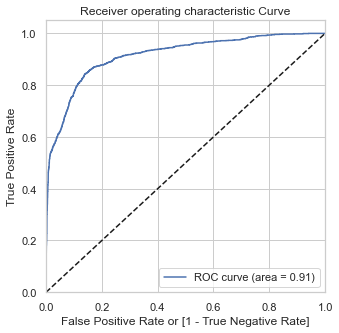

In [189]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 9: Finding Optimal Cutoff Point

#### 9.a Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [190]:
# Let's create columns with different lead score probability cutoffs 
lead_score_prob = [float(x)/10 for x in range(10)] 
for i in lead_score_prob:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.016149,7843,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.001905,3988,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.039753,6358,0,1,0,0,0,0,0,0,0,0,0
3,1.0,0.957299,5068,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.106459,3460,0,1,1,0,0,0,0,0,0,0,0


In [191]:
# Now let's calculate accuracy sensitivity and specificity for various lead score probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Lead_Score_prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    #print('ConfusionMatrix for {}',cm1.format(num))
    total1=sum(sum(cm1))
    #print('Total {}',total1.format(num))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     Lead_Score_prob  accuracy     sensi     speci
0.0              0.0  0.345362  1.000000  0.000000
0.1              0.1  0.652424  0.955128  0.492729
0.2              0.2  0.808723  0.892949  0.764288
0.3              0.3  0.851893  0.847436  0.854244
0.4              0.4  0.857427  0.805128  0.885019
0.5              0.5  0.855656  0.750000  0.911397
0.6              0.6  0.844366  0.673077  0.934731
0.7              0.7  0.836396  0.601923  0.960095
0.8              0.8  0.822891  0.509615  0.988164
0.9              0.9  0.780607  0.375641  0.994251


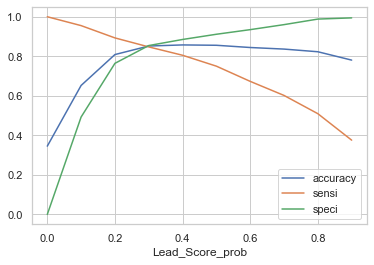

In [192]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Lead_Score_prob', y=['accuracy','sensi','speci'])
plt.show()

In [193]:
def Find_Optimal_Cutoff(target, predicted):
    false_positive_rate, true_positive_rate, threshold_cutoff = metrics.roc_curve(target, predicted)
    i = np.arange(len(true_positive_rate))
    
    # true_negative_rate = 1-false_positive_rate
    
    roc = pd.DataFrame({'tf' : pd.Series(true_positive_rate-(1-false_positive_rate), index=i),
                        'threshold_cutoff' : pd.Series(threshold_cutoff, index=i)})
    print(roc)
    roc_t = roc.iloc[(roc.tf).abs().argsort()[:1]]
    print(roc_t)

    return list(roc_t['threshold_cutoff'])

threshold_cutoff = Find_Optimal_Cutoff(y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob)
threshold_cutoff

            tf  threshold_cutoff
0    -1.000000          1.999570
1    -0.999359          0.999570
2    -0.987179          0.997428
3    -0.985897          0.997341
4    -0.971795          0.995835
...        ...               ...
1379  0.984444          0.001593
1380  0.985120          0.001589
1381  0.991545          0.001491
1382  0.992222          0.001486
1383  1.000000          0.000846

[1384 rows x 2 columns]
           tf  threshold_cutoff
595  0.000152          0.289922


[0.2899221524819958]

In [194]:
print("From the curve above,", round(threshold_cutoff[0],2)," is the optimum point to take it as a cutoff probability.")

From the curve above, 0.29  is the optimum point to take it as a cutoff probability.


In [195]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > round(threshold_cutoff[0],2) else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.016149,7843,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.001905,3988,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.039753,6358,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,0.957299,5068,1,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.106459,3460,0,1,1,0,0,0,0,0,0,0,0,0


In [196]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8501217622315697

In [197]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2514,  443],
       [ 234, 1326]], dtype=int64)

In [198]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [199]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.85


In [200]:
# Let us calculate specificity
print(TN / float(TN+FP))

0.8501859993236388


In [201]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.14981400067636116


In [202]:
# Positive predictive value 
print (TP / float(TP+FP))

0.749576031656303


In [203]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9148471615720524


#### 9.b Precision and Recall

In [204]:
#Looking at the confusion matrix again

In [205]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion3

array([[2695,  262],
       [ 390, 1170]], dtype=int64)

#### Precision

TP / TP + FP

In [206]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8170391061452514

#### Recall

TP / TP + FN

In [207]:
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.75

###### Using sklearn utilities for the same

In [208]:
from sklearn.metrics import precision_score, recall_score

In [209]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8170391061452514

In [210]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.75

#### 9.c Precision and recall tradeoff

In [211]:
from sklearn.metrics import precision_recall_curve

In [212]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0.0
 1       0.0
 2       0.0
 3       1.0
 4       0.0
        ... 
 4512    0.0
 4513    0.0
 4514    0.0
 4515    1.0
 4516    1.0
 Name: Converted, Length: 4517, dtype: float64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4512    0
 4513    0
 4514    0
 4515    1
 4516    1
 Name: predicted, Length: 4517, dtype: int64)

In [213]:
precision, recall, thresholds_prc = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [214]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
print(fscore)

[0.52854481 0.52829549 0.52838502 ... 0.00256082 0.00128123 0.        ]


In [215]:
# locate the index of the largest f score
ix = argmax(fscore)
print(ix)

2300


In [216]:
print('Best Threshold=%f, F-Score=%.3f' % (thresholds_prc[ix], fscore[ix]))

Best Threshold=0.322148, F-Score=0.801


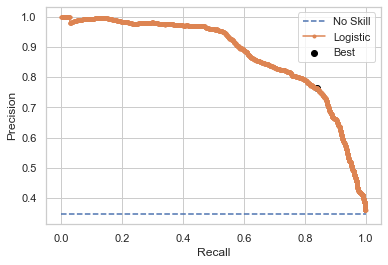

In [217]:
# plot the roc curve for the model
no_skill = len(y_train_pred_final.Converted[y_train_pred_final.Converted==1.0]) / len(y_train_pred_final.Converted)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# show the plot
plt.show()

In [218]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.016149,7843,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.001905,3988,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.039753,6358,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,0.957299,5068,1,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.106459,3460,0,1,1,0,0,0,0,0,0,0,0,0


In [219]:
y_train=y_train_pred_final[['Converted','Lead_Number','final_predicted']]

In [220]:
y_train.set_index('Lead_Number')

,Converted,final_predicted
Lead_Number,,
7843,0.0,0
3988,0.0,0
6358,0.0,0
5068,1.0,1
3460,0.0,0
...,...,...
8668,0.0,0
105,0.0,0
5545,0.0,0


In [221]:
X_train.head()

,Time_Spent_on_Website,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
7843,165.0,15.0,0,1,0,0,1
3988,206.0,15.0,0,1,0,0,0
6358,1331.0,16.3,0,1,0,0,0
5068,1298.0,16.3,0,0,1,0,1
3460,660.0,18.0,0,0,0,0,0


In [222]:
X_train.index.name = 'Lead_Number'

In [223]:
Lead_train = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [224]:
Lead_train.head()

,Time_Spent_on_Website,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent,Converted,Lead_Number,final_predicted
3988,206.0,15.0,0,1,0,0,0,0.0,7587,0
3460,660.0,18.0,0,0,0,0,0,1.0,5349,1
1010,1485.0,20.0,0,0,1,1,0,0.0,5496,0
837,65.0,15.0,0,0,0,0,0,0.0,8455,0
2977,222.0,16.3,0,0,1,0,1,0.0,6597,0


In [225]:
Lead_train.isna().sum()

Time_Spent_on_Website                            0
Asymmetric_Profile_Score                         0
Current_Occupation_Working_Professional          0
Tags_Ringing                                     0
Tags_Will_revert_after_reading_the_email         0
Lead_Quality_Other_than_Might_be_and_Not_Sure    0
Last_Notable_Activity_SMS_Sent                   0
Converted                                        0
Lead_Number                                      0
final_predicted                                  0
dtype: int64

In [226]:
Lead_train.shape

(2222, 10)

In [227]:
Lead=Lead_train

In [228]:
colm_vifu

['Time_Spent_on_Website',
 'Asymmetric_Profile_Score',
 'Current_Occupation_Working_Professional',
 'Tags_Ringing',
 'Tags_Will_revert_after_reading_the_email',
 'Lead_Quality_Other_than_Might_be_and_Not_Sure',
 'Last_Notable_Activity_SMS_Sent']

In [229]:
ab=[]
for c in Lead.columns:
    if c not in colm_vifu:
        ab.append(c)
ab

['Converted', 'Lead_Number', 'final_predicted']

In [230]:
Lead.drop(['Converted'],axis=1,inplace=True)

In [231]:
Lead.columns

Index(['Time_Spent_on_Website', 'Asymmetric_Profile_Score',
       'Current_Occupation_Working_Professional', 'Tags_Ringing',
       'Tags_Will_revert_after_reading_the_email',
       'Lead_Quality_Other_than_Might_be_and_Not_Sure',
       'Last_Notable_Activity_SMS_Sent', 'Lead_Number', 'final_predicted'],
      dtype='object')

## Step 10: Making predictions on the test set

In [232]:
X_test

,Time_Spent_on_Website,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
152,234.0,18.0,0,0,0,0,0
2956,1344.0,16.3,0,0,0,0,0
4598,169.0,16.3,0,0,0,1,0
4210,409.0,16.3,0,0,1,0,0
7361,61.0,15.0,0,0,1,0,1
...,...,...,...,...,...,...,...
6147,86.0,16.3,0,0,1,0,1
6532,1281.0,16.3,0,0,1,0,1
7308,281.0,17.0,0,0,1,0,0
2057,213.0,15.0,0,0,1,0,0


In [233]:
X_test_sc=scaler.transform(X_test)

In [234]:
colm_vifu

['Time_Spent_on_Website',
 'Asymmetric_Profile_Score',
 'Current_Occupation_Working_Professional',
 'Tags_Ringing',
 'Tags_Will_revert_after_reading_the_email',
 'Lead_Quality_Other_than_Might_be_and_Not_Sure',
 'Last_Notable_Activity_SMS_Sent']

In [235]:
X_test_sm = sm.add_constant(X_test_sc)

Making predictions on the test set

In [236]:
y_test_pred = res.predict(X_test_sm)

In [237]:
y_test_pred[:10]

array([0.03941075, 0.31912466, 0.11065375, 0.20273459, 0.43848394,
       0.4199152 , 0.94294979, 0.38530328, 0.36942831, 0.14723383])

In [238]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [239]:
# Let's see the head
y_pred_df.head()

,0
0,0.039411
1,0.319125
2,0.110654
3,0.202735
4,0.438484


In [240]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [241]:
# Putting Lead_Number to index
y_test_df['Lead_Number'] = y_test_df.index

In [242]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [243]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [244]:
y_pred_final.head()

,Converted,Lead_Number,0
0,0.0,152,0.039411
1,1.0,2956,0.319125
2,0.0,4598,0.110654
3,1.0,4210,0.202735
4,1.0,7361,0.438484


In [245]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [246]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead_Number','Converted','Converted_Prob'], axis=1)

In [247]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_Number,Converted,Converted_Prob
0,152,0.0,0.039411
1,2956,1.0,0.319125
2,4598,0.0,0.110654
3,4210,1.0,0.202735
4,7361,1.0,0.438484


In [248]:
# Best Threshold = 0.32

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > thresholds_prc[ix] else 0)

In [249]:
y_pred_final.head(10)

,Lead_Number,Converted,Converted_Prob,final_predicted
0,152,0.0,0.039411,0
1,2956,1.0,0.319125,0
2,4598,0.0,0.110654,0
3,4210,1.0,0.202735,0
4,7361,1.0,0.438484,1
5,1546,1.0,0.419915,1
6,7136,1.0,0.942950,1
7,644,1.0,0.385303,1
8,6771,0.0,0.369428,1
9,1755,0.0,0.147234,0


In [250]:
y_pred_final['Converted_Prob_Rounded']=y_pred_final['Converted_Prob'].round(2)

In [251]:
y_pred_final.head()

,Lead_Number,Converted,Converted_Prob,final_predicted,Converted_Prob_Rounded
0,152,0.0,0.039411,0,0.04
1,2956,1.0,0.319125,0,0.32
2,4598,0.0,0.110654,0,0.11
3,4210,1.0,0.202735,0,0.20
4,7361,1.0,0.438484,1,0.44


In [252]:
y_pred_final['LEAD_SCORE'] = pd.qcut(y_pred_final['Converted_Prob_Rounded'].rank(method='first'), 101, labels=False)

y_pred_final.head(10)

,Lead_Number,Converted,Converted_Prob,final_predicted,Converted_Prob_Rounded,LEAD_SCORE
0,152,0.0,0.039411,0,0.04,21
1,2956,1.0,0.319125,0,0.32,61
2,4598,0.0,0.110654,0,0.11,35
3,4210,1.0,0.202735,0,0.20,52
4,7361,1.0,0.438484,1,0.44,65
5,1546,1.0,0.419915,1,0.42,65
6,7136,1.0,0.942950,1,0.94,89
7,644,1.0,0.385303,1,0.39,64
8,6771,0.0,0.369428,1,0.37,63
9,1755,0.0,0.147234,0,0.15,44


In [253]:
## Above Lead Score value that leads to productive calls to students

#Best Threshold is 0.32

lead_score_set=set(y_pred_final['Converted_Prob_Rounded'].to_list())
lead_score_set

{0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0}

In [254]:
Optimal_Lead_Score=y_pred_final.loc[y_pred_final['Converted_Prob_Rounded'] == 0.32, 'LEAD_SCORE'].iloc[0] 
Optimal_Lead_Score

61

In [255]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8508002065049045

In [256]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1083,  179],
       [ 110,  565]], dtype=int64)

In [257]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [258]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.837037037037037


In [259]:
# Let us calculate specificity
print(TN / float(TN+FP))

0.8581616481774961


#### SUBJECTIVE QUESTION AND ANSWERS

In [260]:
y_subj=y_pred_final[['Lead_Number','final_predicted']]

In [261]:
X_test.head()

,Time_Spent_on_Website,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
152,234.0,18.0,0,0,0,0,0
2956,1344.0,16.3,0,0,0,0,0
4598,169.0,16.3,0,0,0,1,0
4210,409.0,16.3,0,0,1,0,0
7361,61.0,15.0,0,0,1,0,1


In [262]:
X_subj=X_test.copy()

In [263]:
X_subj.head()

,Time_Spent_on_Website,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
152,234.0,18.0,0,0,0,0,0
2956,1344.0,16.3,0,0,0,0,0
4598,169.0,16.3,0,0,0,1,0
4210,409.0,16.3,0,0,1,0,0
7361,61.0,15.0,0,0,1,0,1


In [264]:
X_subj['Lead_Number']=X_test.index
X_subj = X_subj.reset_index(drop=True)

In [265]:
x_y_merge=y_subj.merge(X_subj, how = 'inner')

In [266]:
x_y_merge.head()

,Lead_Number,final_predicted,Time_Spent_on_Website,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
0,152,0,234.0,18.0,0,0,0,0,0
1,2956,0,1344.0,16.3,0,0,0,0,0
2,4598,0,169.0,16.3,0,0,0,1,0
3,4210,0,409.0,16.3,0,0,1,0,0
4,7361,1,61.0,15.0,0,0,1,0,1


In [267]:
#x_y_merge=x_y_merge.rename(columns={'Last Notable Activity_Email Bounced':'Last_Notable_Activity_Email_Bounced'})

In [268]:
x_y_merge.head()

,Lead_Number,final_predicted,Time_Spent_on_Website,Asymmetric_Profile_Score,Current_Occupation_Working_Professional,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Lead_Quality_Other_than_Might_be_and_Not_Sure,Last_Notable_Activity_SMS_Sent
0,152,0,234.0,18.0,0,0,0,0,0
1,2956,0,1344.0,16.3,0,0,0,0,0
2,4598,0,169.0,16.3,0,0,0,1,0
3,4210,0,409.0,16.3,0,0,1,0,0
4,7361,1,61.0,15.0,0,0,1,0,1


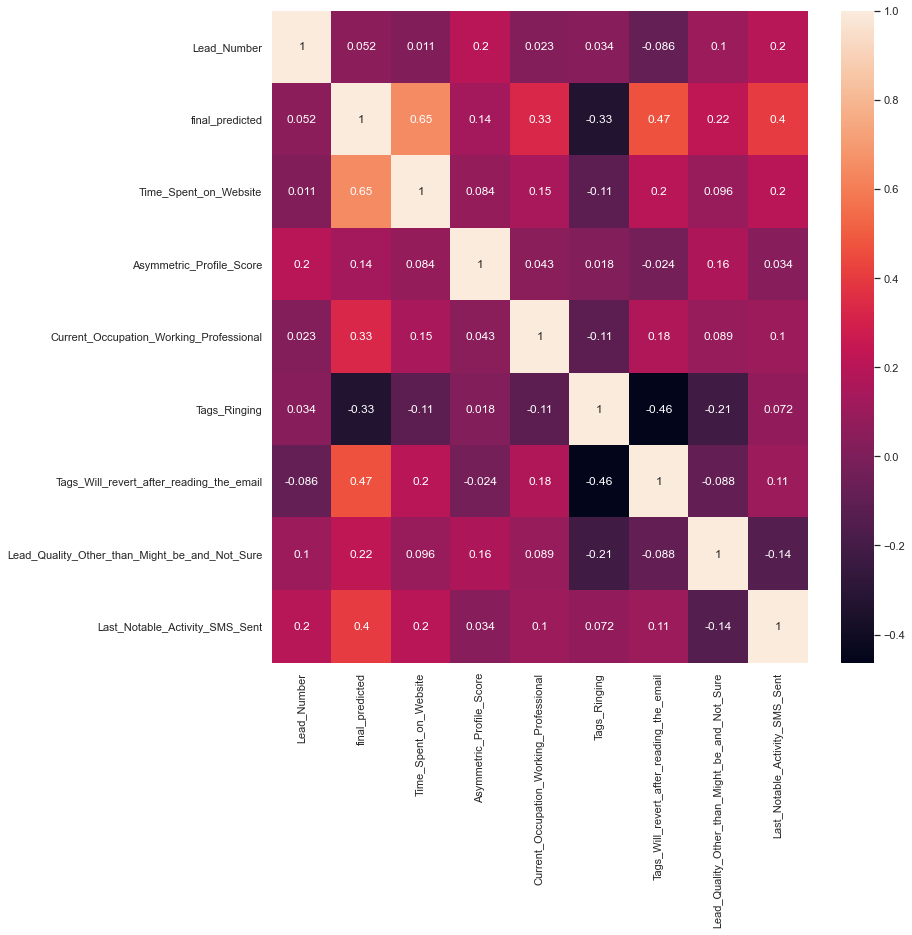

In [269]:
# plotting heatmap to understand exact correlation between variables

plt.figure(figsize=(12,12))
sns.heatmap(x_y_merge.corr(),annot=True);

In [270]:
y_subj=y_pred_final[['Lead_Number','LEAD_SCORE']]

In [271]:
Useful_calls = y_subj.loc[y_subj['LEAD_SCORE'] > Optimal_Lead_Score]

In [272]:
Useful_calls

,Lead_Number,LEAD_SCORE
4,7361,65
5,1546,65
6,7136,89
7,644,64
8,6771,63
...,...,...
1927,8083,68
1929,1811,75
1931,1669,72
1932,6147,68


In [273]:
print("The team should call to those leads who hold rank above",Optimal_Lead_Score," because they have more probability of getting converted.")

The team should call to those leads who hold rank above 61  because they have more probability of getting converted.


### Strategy

Initially, team should mainly focus on the variable 'final_predicted' along with 'LEAD_SCORE'. That lead should be contacted who have lead score greater than 61.That lead will have higher probability of becoming 'HOT LEAD'. So in this way, team can ring more productive calls rather than wasting valuable time.

In [274]:
Lead.columns

Index(['Time_Spent_on_Website', 'Asymmetric_Profile_Score',
       'Current_Occupation_Working_Professional', 'Tags_Ringing',
       'Tags_Will_revert_after_reading_the_email',
       'Lead_Quality_Other_than_Might_be_and_Not_Sure',
       'Last_Notable_Activity_SMS_Sent', 'Lead_Number', 'final_predicted'],
      dtype='object')

In [275]:
X=Lead.drop(['Lead_Number', 'final_predicted'],axis=1)

In [276]:
X.shape

(2222, 7)

In [277]:
y=Lead['final_predicted']

In [278]:
y.shape

(2222,)

In [279]:
# train-test-split

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [280]:
X_train_sc.shape

(4517, 7)

In [281]:
X_test_sc.shape

(1937, 7)

In [282]:
y_train.shape

(4517, 3)

In [283]:
y_test.shape

(1937,)

In [284]:
y_train=y_train.drop(['Converted','Lead_Number'],axis=1)

In [285]:
from sklearn.metrics import accuracy_score

#### Decision Tree Classifier

In [286]:
from sklearn.tree import DecisionTreeClassifier

In [287]:
dt_classifier=DecisionTreeClassifier()
_=dt_classifier.fit(X_train_sc,y_train)

In [288]:
y_pred_dt=dt_classifier.predict(X_test_sc)
dt_accuracy=round(accuracy_score(y_test,y_pred_dt)*100,2)

In [289]:
dt_accuracy

84.0

#### Random Forest Classifier

In [290]:
from sklearn.ensemble import RandomForestClassifier

In [291]:
rfc_classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=51)
rfc_classifier.fit(X_train_sc,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=51)

In [292]:
y_pred_rfc=rfc_classifier.predict(X_test_sc)
rfc_accuracy=round(accuracy_score(y_test,y_pred_rfc)*100,2)

In [293]:
rfc_accuracy

84.2

#### AdaBoost Classifier

In [294]:
from sklearn.ensemble import AdaBoostClassifier

In [295]:
adb_classifier=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',random_state=21),
                                 n_estimators=2000,
                                 learning_rate=0.1,
                                 algorithm='SAMME.R',
                                 random_state=1)
adb_classifier.fit(X_train_sc,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         random_state=21),
                   learning_rate=0.1, n_estimators=2000, random_state=1)

In [296]:
y_pred_adb=adb_classifier.predict(X_test_sc)
adb_accuracy=round(accuracy_score(y_test,y_pred_adb)*100,2)

In [297]:
adb_accuracy

84.2

#### XGBoost Classifier

In [298]:
import xgboost as xgb

In [299]:
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train_sc,y_train)

[23:12:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [300]:
y_pred_xgb=xgb_classifier.predict(X_test_sc)
xgb_accuracy=round(accuracy_score(y_test,y_pred_xgb)*100,2)

In [301]:
xgb_accuracy

84.51

### Saving the Model

In [302]:
import pickle

#dump information to that file
pickle.dump(logm_vif,open('logmodel.pkl','wb'))

#load a model
pickle.load(open('logmodel.pkl','rb'))